In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

In [2]:
#Import data
ords_prods_cust_merge= pd.read_pickle(r"C:\Users\Asus\Instacart Basket Analysis\02 Data\Prepared Data\final_data.pkl")

In [3]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_order_freq_flag,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [4]:
ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_days',
       'busiest_hours', 'max_orders', 'loyalty_flag', 'avg_spend',
       'spender_flag', 'median_order_frequency', 'median_order_freq_flag',
       'first_name', 'surname', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income'],
      dtype='object')

### Create a histogram of the “order_hour_of_day” column

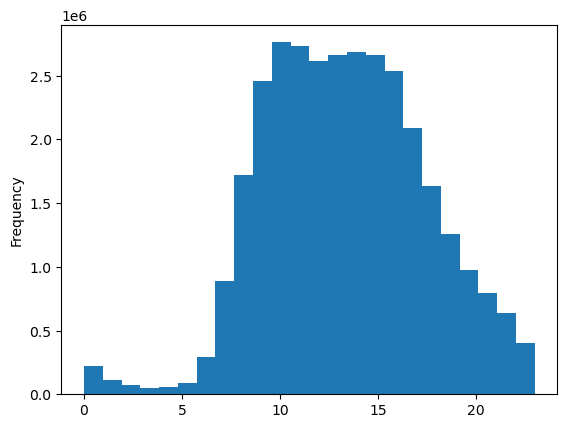

In [6]:
hist_order_hour_of_day=ords_prods_cust_merge["order_hour_of_day"].plot.hist(bins=24)

 We can see from the above histogram the busiest hours of the day is from 10 am to 5 pm and the least order hours is from 12 am to 6 am  

In [7]:
# Export histogram 
hist_order_hour_of_day.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\hist_order_of_day.png")

### Create a bar chart from the “loyalty_flag” column

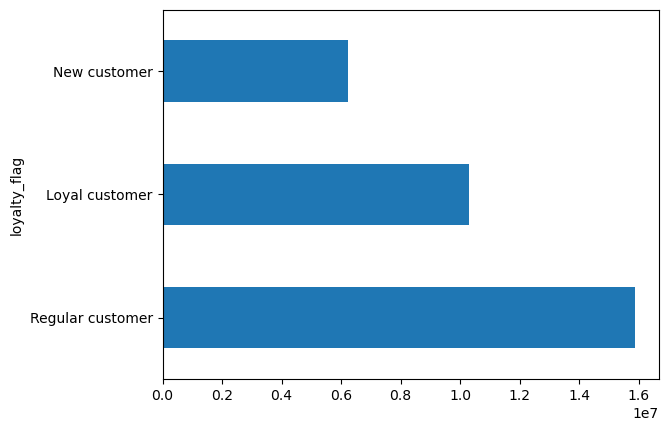

In [30]:
bar_loyalty_flag= ords_prods_cust_merge["loyalty_flag"].value_counts().plot.barh()

In [32]:
# Export bar chart
bar_loyalty_flag.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\bar_loyalty_flag.png", bbox_inches='tight')

### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [10]:
#Create a list holding True/False values to the test np.random.rand() <=0.7

np.random.seed(4)
dev=np.random.rand(len(ords_prods_cust_merge))<0.7

In [11]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
# Store 70% of the sample in the dataframe big

big=ords_prods_cust_merge[dev]

In [13]:
# Store 30% of the sample in the dataframe small

small=ords_prods_cust_merge[~dev]

In [14]:
len(ords_prods_cust_merge)

32404859

In [15]:
len(big)+len(small)

32404859

In [16]:
small.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_days',
       'busiest_hours', 'max_orders', 'loyalty_flag', 'avg_spend',
       'spender_flag', 'median_order_frequency', 'median_order_freq_flag',
       'first_name', 'surname', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income'],
      dtype='object')

In [17]:
df2= small[["order_hour_of_day", "prices"]]

In [18]:
df2

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32404841,12,10.7
32404842,3,10.7
32404843,1,10.7
32404849,18,10.7


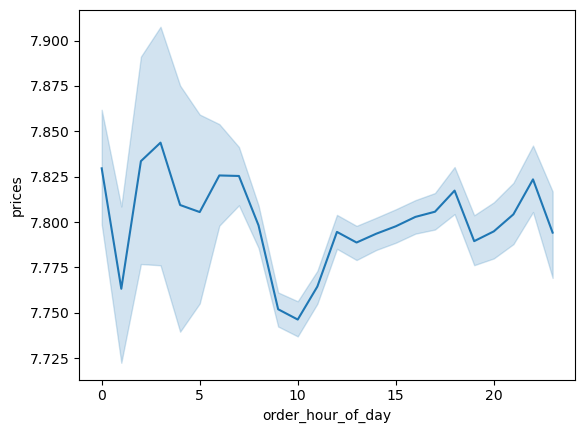

In [19]:
line=sns.lineplot(df2, x="order_hour_of_day", y= "prices")

In [20]:
line_hour_of_day= line.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\line_hour_of_day.png")

#### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

    In a markdown cell beneath your line chart, describe what the line chart shows.


In [21]:
df3= small[["age", "number_of_dependants"]]

In [22]:
df3

,age,number_of_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,25,0
32404842,25,0
32404843,25,0
32404849,25,0


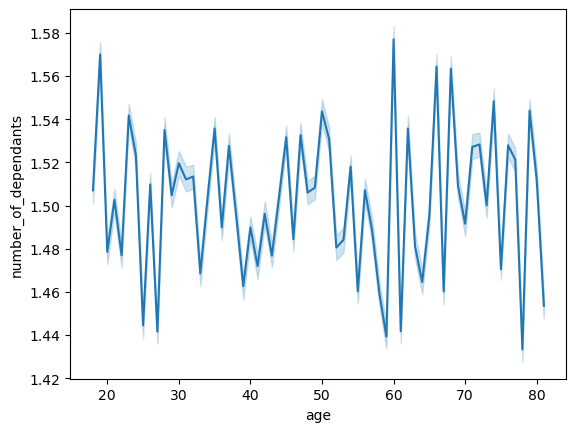

In [23]:
line_2=sns.lineplot(df3, x="age", y="number_of_dependants")

The line chart doesnt depict any relationahip between age and number of dependants 

In [24]:
#Export the line chart
line_number_of_dependants_and_age= line_2.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\line_number_of_dependants_and_age.png")

#### 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. 

In [25]:
df4= small[["age", "income"]]

In [26]:
df4.head()

,age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


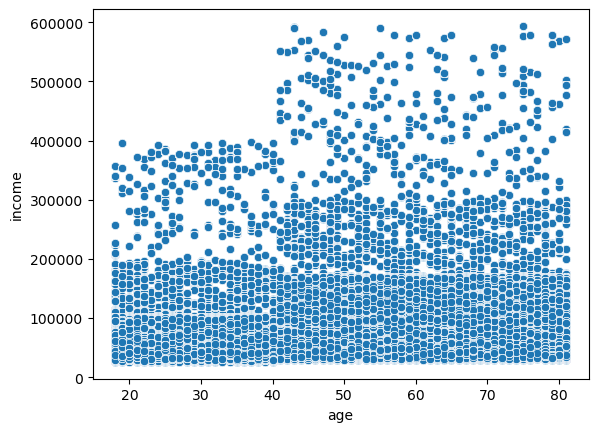

In [27]:
scatterplot_age_income=sns.scatterplot(x = 'age', y = 'income', data = df4)

All the age group from 20 to 80 earn around 200000. However, the spending increases from the age of 43 to 80. The scatterplot shows that once individuals turn 40 their potential earns would change from 400000 to 600000. As such the scatterplot between age and income depicts that there is a correlation

In [28]:
# Export the scatter plot
scatterplot_age_income.figure.savefig(r"C:\Users\Asus\Instacart Basket Analysis\04 Analysis\Visualizations\age_income.png")